# Estimación de parámetros
_Juliana Vallejo Díez, Paola Andrea Fernández López, María Camila Vásquez Correa_

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Procesos de reversión a la media con tendencia constante.

$$dX_t = \alpha(\mu - X_t)dt + \sigma X_t^\gamma dB_t \qquad t\in[0,T] \qquad X_0 = x$$

* $\alpha>0$ es la tasa de reversión.
* $\mu$ es el nivel medio de reversión.
* $\sigma > 0$ está asociado con la volatilidad.
* $\gamma \in [0, 3_/2]$ determina la sensibilidad de la varianza.

### Simulación

**Parámetros**

In [40]:
X0 = 6
alpha = 0.12
sigma = 0.6
gamma = 0.5
mu = 6
N = 10000
dt = 1/1000
t = np.arange(0, N)

**Simulación trayectoria**

In [47]:
k = 1000
X = np.zeros((k,N))
X[:,0] = X0
for i in range(k):
    for j in range(1,N):
        X[i,j] = X[i,j-1] + alpha*(mu - X[i,j-1])*dt + sigma*X[i,j-1]**gamma*np.sqrt(dt)*np.random.normal()    

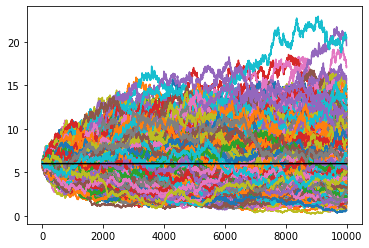

In [48]:
plt.plot(X.T)
plt.plot(mu*np.ones(N), 'black')
plt.show()

Es necesario que, antes de hacer la estimación de parámetros, se haga un chequeo de la base de datos, que pruebe:
* Si la serie en diferencias sigue una distribución Normal.
* Si el coeficiente de Hurst y la dimensión fractal suman 2.


**Estimación**

La estimación está basada en _Parameter Estimation in Mean Reversion Processes with Deterministic Long-Term Trend, Marín y Gallego_

In [49]:
X = X[0,:]

In [50]:
A = np.sum(np.array([(X[i]*X[i-1])/(X[i-1]**(2*gamma)) for i in range(1,N)]))
B = np.sum(np.array([(X[i-1])/(X[i-1]**(2*gamma)) for i in range(1,N)]))
C = np.sum(np.array([(X[i])/(X[i-1]**(2*gamma)) for i in range(1,N)]))
D = np.sum(np.array([1/(X[i-1]**(2*gamma)) for i in range(1,N)]))
E = np.sum(np.array([(X[i-1]/(X[i-1]**(gamma)))**2 for i in range(1,N)]))

In [51]:
alphae = (E*D - B**2 - A*D + B*C)/((E*D - B**2)*dt)
mue = (A - E*(1 - alphae*dt))/(alphae*B*dt)
sigmae = [((X[i] - X[i-1] - alphae*(mue - X[i-1])*dt)/(X[i-1]**gamma))**2 for i in range(1,N)]
sigmae = np.sqrt((1/(N*dt))*np.sum(sigmae))
print(' alpha:', alphae, '\n', 'sigma:', sigmae, '\n', 'mu:', mue)

 alpha: 0.5617028270894103 
 sigma: 0.5989079039637281 
 mu: 6.483195703232412


**Simulación con parámetros estimados**

Ahora que pudimos estimar los parámetros, queremos ver qué tanto se ajustan a los datos reales. Para eso, hacemo $r$ simulaciones usando el esquema numérico de Euler y calculamos el error relativo promedio.

In [54]:
r = 1000
S = np.zeros((r,N))
S[:,0] = X[0]
e = []
for i in range(r):
    err = []
    for j in range(1,N):
        S[i,j] = X[j-1] + alphae*(mue - X[j-1])*dt + sigmae*X[j-1]**gamma*np.sqrt(dt)*np.random.normal()
        err.append(np.abs(S[i,j] - X[j])/X[j])
    e.append(np.mean(err))

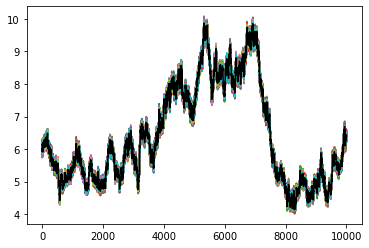

In [53]:
plt.plot(S.T)
plt.plot(X, 'black')
plt.show()

In [55]:
print(np.mean(e))

0.008602514871913564


Se puede definir un error relativo máximo. En muchos casos se espera que este error no supere el 5\%.